In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from base import DecisionTree
from metrics import *

np.random.seed(42)

# Reading the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
data = pd.read_csv(url, delim_whitespace=True, header=None,
                 names=["mpg", "cylinders", "displacement", "horsepower", "weight",
                        "acceleration", "model year", "origin", "car name"])

# Clean the above data by removing redundant columns and rows with junk values
# Compare the performance of your model with the decision tree module from scikit learn

C:\Users\patel\AppData\Local\Temp\ipykernel_16980\2503706414.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, header=None,


In [2]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [3]:
data = data.drop("car name", axis=1)
data = data.replace("?", np.nan)
data = data.dropna()
data = data.drop_duplicates()

# Now the data should be clean
data1 = data.reset_index(drop=True)
data1['horsepower'] = pd.to_numeric(data1['horsepower'], errors='coerce')
data1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [4]:
for attr in data1.columns:
    mean = data1[attr].mean()
    std = data1[attr].std()
    
    print(f"Mean of the {attr} is: {mean}")
    print(f"Std of the {attr} is: {std}")
    print(f"Unique values in {attr} is: {len(data1[attr].unique())}")
    print("*"*100)


Mean of the mpg is: 23.445918367346938
Std of the mpg is: 7.8050074865717995
Unique values in mpg is: 127
****************************************************************************************************
Mean of the cylinders is: 5.471938775510204
Std of the cylinders is: 1.7057832474527845
Unique values in cylinders is: 5
****************************************************************************************************
Mean of the displacement is: 194.41198979591837
Std of the displacement is: 104.64400390890466
Unique values in displacement is: 81
****************************************************************************************************
Mean of the horsepower is: 104.46938775510205
Std of the horsepower is: 38.49115993282849
Unique values in horsepower is: 93
****************************************************************************************************
Mean of the weight is: 2977.5841836734694
Std of the weight is: 849.4025600429492
Unique values in weight is: 34

In [5]:
dt1 = data1[data1['origin']==1]
print(len(dt1))
print(245/392)

245
0.625


In [6]:
data1 = data1.drop("origin",axis=1)
data1 = data1.drop("cylinders",axis=1)
data1 = data1.drop("model year",axis=1)
data1

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5
...,...,...,...,...,...
387,27.0,140.0,86.0,2790.0,15.6
388,44.0,97.0,52.0,2130.0,24.6
389,32.0,135.0,84.0,2295.0,11.6
390,28.0,120.0,79.0,2625.0,18.6


In [7]:
features = list(data1.columns)
features.remove('mpg')


train_data = data1[:274]
test_data = data1[274:].reset_index(drop=True)

training_data = train_data[features]
training_labels = train_data['mpg'].reset_index(drop=True)

testing_data = test_data[features]
testing_labels = test_data['mpg'].reset_index(drop=True)

In [8]:
decision_tree = DecisionTree('mse',5,2)
decision_tree.fit(training_data,training_labels)
pred = decision_tree.predict(testing_data)
print(pred)
maes = mae(pd.Series(pred),testing_labels)
print(maes)

[18.  18.  30.  26.  18.  21.  21.  19.  18.  13.  17.  13.  13.  14.
 13.  17.  13.  29.  30.  29.  24.  21.  13.  21.  16.  26.  26.  30.
 26.  24.  21.  21.  24.  26.  30.  26.  30.  24.  21.  19.  19.  26.
 24.  24.  24.  26.  26.  18.  20.  20.  24.  21.  21.  29.  26.  29.
 18.  24.  24.  26.  24.  24.  21.  21.  24.  31.  29.  31.  30.  30.
 30.  30.  26.  30.  24.  26.  26.  24.  24.  24.  21.  21.  18.  18.
 18.  17.  21.  20.2 24.  24.  24.  24.  24.  24.  19.  30.  30.  30.
 26.  26.  26.  26.  26.  30.  30.  30.  18.  16.  21.  18.  24.  24.
 19.  21.  20.  26.  24.  24. ]
6.937288135593221


In [9]:
max_depths = [4,5,6,7,8,9,10,11,12]
maes_t = []
for depth in max_depths:
    decision_tree = DecisionTree('mse',depth,2)
    decision_tree.fit(training_data,training_labels)
    pred_t = decision_tree.predict(testing_data)
    pred_tr = decision_tree.predict(training_data)
    maes_t.append(mae(pred_t,testing_labels))
print(maes_t)
opt_depth = 11

from sklearn.tree import DecisionTreeRegressor, plot_tree


maes_s = []

for depths in max_depths:
    # Create a decision tree model
    decision_tree_model = DecisionTreeRegressor(random_state=42,max_depth=depths)

    # Fit the model
    decision_tree_model.fit(training_data, training_labels)

    # Make predictions on the testing data
    predictions = decision_tree_model.predict(testing_data)
    maes_s.append(mae(pd.Series(predictions),testing_labels))
print(maes_s)

[7.010169491525424, 6.937288135593221, 6.928813559322033, 6.607627118644068, 6.497457627118645, 6.238983050847458, 6.205084745762712, 6.230508474576272, 6.1881355932203395]
[6.213665587031397, 6.383282807358705, 6.400975807318215, 6.165923360017919, 6.279764674466374, 6.3804485533299085, 6.319753833736884, 6.295127118644068, 6.296468926553673]


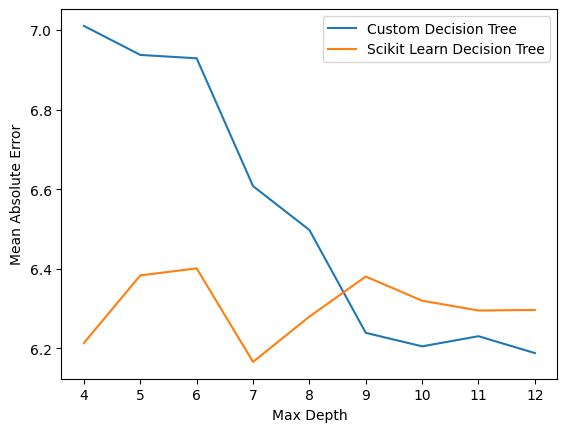

In [10]:
# Plot the MAE values
plt.plot(max_depths, maes_t, label='Custom Decision Tree')
plt.plot(max_depths, maes_s, label='Scikit Learn Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()